In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df=pd.read_csv('/content/data.csv',encoding="ISO-8859-1")
df.tail(5)

<ipython-input-3-7a93ba6502ed>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/data.csv',encoding="ISO-8859-1")


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(435742, 13)

In [5]:
tn = df.query('state=="Tamil Nadu" ')
tn.sample(5)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
347277,NaN,3/6/2006,Tamil Nadu,Madurai,NaN,Residential and others,9.7,39.1,59.0,154.0,Highway Bldg.,NaN,2006-06-03
349630,NaN,21/2/2008,Tamil Nadu,Chennai,NaN,Residential and others,19.5,17.0,17.0,130.0,Madras Med. College,NaN,2008-02-21
356067,309.0,1/9/2012,Tamil Nadu,Salem,Tamilnadu State Pollution Control Board,"Residential, Rural and other Areas",7.0,21.0,57.0,NaN,"Sowdeswari College Building, Salem",NaN,2012-09-01
343992,159.0,February - M021992,Tamil Nadu,Madras,NaN,"Residential, Rural and other Areas",6.7,17.6,NaN,108.0,NaN,NaN,1992-02-01
350569,NaN,29/8/2008,Tamil Nadu,Thoothukudi,NaN,Industrial Areas,8.3,29.7,78.0,108.0,Raja Agencies,NaN,2008-08-29


In [6]:
tn.shape

(20597, 13)

In [13]:
tn.drop(labels=['stn_code','sampling_date','agency','location_monitoring_station'])
tn.sample(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
349797,Tamil Nadu,Coimbatore,Industrial Areas,9.6,38.7,105.0,282.0,NaN,2008-01-25
357546,Tamil Nadu,Coimbatore,"Residential, Rural and other Areas",5.0,21.0,34.0,NaN,NaN,2013-02-09
351766,Tamil Nadu,Thoothukudi,Residential and others,17.0,10.1,62.0,128.0,NaN,2009-01-27
353628,Tamil Nadu,Chennai,Industrial Area,17.0,35.0,106.0,NaN,NaN,2011-11-30
347821,Tamil Nadu,Thoothukudi,Residential and others,21.4,23.8,39.0,45.0,NaN,2006-08-14


In [14]:
tn.isnull().sum()

state           0
location        0
type          354
so2           691
no2           616
rspm         1805
spm         11067
pm2_5       20143
date            0
dtype: int64

In [15]:
tn.drop(labels = ['pm2_5'], axis =1, inplace = True)
tn.head(5)

<ipython-input-15-9d0cc1e86781>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn.drop(labels = ['pm2_5'], axis =1, inplace = True)


,state,location,type,so2,no2,rspm,spm,date
343639,Tamil Nadu,Madras,Industrial,0.5,0.3,NaN,82.0,1987-01-27
343640,Tamil Nadu,Madras,Industrial,12.9,1.3,NaN,290.0,1987-04-13
343641,Tamil Nadu,Madras,Industrial,38.8,0.9,NaN,222.0,1987-01-05
343642,Tamil Nadu,Madras,Industrial,29.7,1.1,NaN,213.0,1987-01-06
343643,Tamil Nadu,Madras,Industrial,27.5,1.3,NaN,223.0,1987-01-07


In [16]:
tn.dtypes


state        object
location     object
type         object
so2         float64
no2         float64
rspm        float64
spm         float64
date         object
dtype: object

In [17]:
tn['date'] = pd.to_datetime(tn.date,format='%Y-%m-%d')
tn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20597 entries, 343639 to 364235
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     20597 non-null  object        
 1   location  20597 non-null  object        
 2   type      20243 non-null  object        
 3   so2       19906 non-null  float64       
 4   no2       19981 non-null  float64       
 5   rspm      18792 non-null  float64       
 6   spm       9530 non-null   float64       
 7   date      20597 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 1.9+ MB


<ipython-input-17-13050dcceff6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['date'] = pd.to_datetime(tn.date,format='%Y-%m-%d')


In [18]:
tn.sort_values(by='date')

,state,location,type,so2,no2,rspm,spm,date
343641,Tamil Nadu,Madras,Industrial,38.8,0.9,NaN,222.0,1987-01-05
343642,Tamil Nadu,Madras,Industrial,29.7,1.1,NaN,213.0,1987-01-06
343643,Tamil Nadu,Madras,Industrial,27.5,1.3,NaN,223.0,1987-01-07
343656,Tamil Nadu,Madras,Residential,4.0,1.0,NaN,116.0,1987-01-12
343655,Tamil Nadu,Madras,Residential,8.3,0.8,NaN,121.0,1987-01-12
...,...,...,...,...,...,...,...,...
363476,Tamil Nadu,Cuddalore,"Residential, Rural and other Areas",12.0,18.0,53.0,NaN,2015-12-31
363989,Tamil Nadu,Chennai,"Residential, Rural and other Areas",10.0,14.0,123.0,NaN,2015-12-31
362831,Tamil Nadu,Madurai,"Residential, Rural and other Areas",9.0,23.0,58.0,NaN,2015-12-31
362605,Tamil Nadu,Coimbatore,"Residential, Rural and other Areas",4.0,27.0,88.0,NaN,2015-12-31


In [19]:
tn.isnull().sum()

state           0
location        0
type          354
so2           691
no2           616
rspm         1805
spm         11067
date            0
dtype: int64

In [20]:
tn['so2'].fillna(method='ffill',inplace = True);
tn['no2'].fillna(method='ffill',inplace = True);
tn['rspm'].fillna(method='ffill',inplace = True);
tn['spm'].fillna(method='ffill',inplace = True);

<ipython-input-20-05f451f91646>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['so2'].fillna(method='ffill',inplace = True);
<ipython-input-20-05f451f91646>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['no2'].fillna(method='ffill',inplace = True);
<ipython-input-20-05f451f91646>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['rspm'].fillna(method='ffill',inplace = True);
<ipython-input-20-05f451f91646>:4: SettingWithCo

In [21]:
tn.isnull().sum()

state          0
location       0
type         354
so2            0
no2            0
rspm        1636
spm            0
date           0
dtype: int64

In [22]:
tn.drop(labels = ['rspm'], axis = 1, inplace = True)
tn.head()

<ipython-input-22-4c9088f3da71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn.drop(labels = ['rspm'], axis = 1, inplace = True)


,state,location,type,so2,no2,spm,date
343639,Tamil Nadu,Madras,Industrial,0.5,0.3,82.0,1987-01-27
343640,Tamil Nadu,Madras,Industrial,12.9,1.3,290.0,1987-04-13
343641,Tamil Nadu,Madras,Industrial,38.8,0.9,222.0,1987-01-05
343642,Tamil Nadu,Madras,Industrial,29.7,1.1,213.0,1987-01-06
343643,Tamil Nadu,Madras,Industrial,27.5,1.3,223.0,1987-01-07


In [23]:
tn.isnull().sum()


state         0
location      0
type        354
so2           0
no2           0
spm           0
date          0
dtype: int64

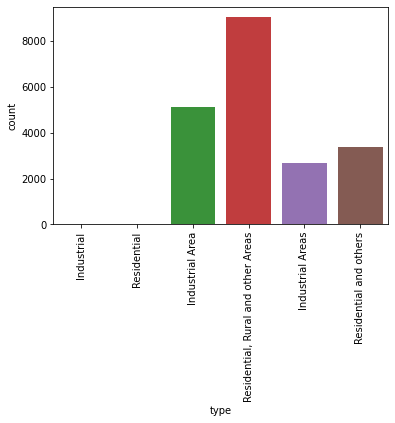

In [24]:
typ=sns.countplot(x ="type",data = tn)
typ.set_xticklabels(typ.get_xticklabels(), rotation=90);

In [25]:
tn['type'].replace("Industrial Areas","Industrial",inplace=True)
tn['type'].replace("Industrial Area","Industrial",inplace=True)
tn['type'].replace("Residential and others","Residential",inplace=True)
tn['type'].replace("Residential, Rural and other Areas","Residential",inplace=True)

<ipython-input-25-47c7a071bc87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['type'].replace("Industrial Areas","Industrial",inplace=True)
<ipython-input-25-47c7a071bc87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['type'].replace("Industrial Area","Industrial",inplace=True)
<ipython-input-25-47c7a071bc87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['type'].replace("Residential and others","Residential",inplace=T

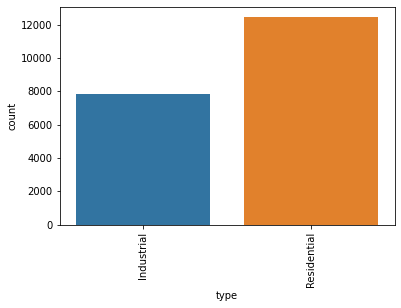

In [26]:
typ=sns.countplot(x ="type",data = tn)
typ.set_xticklabels(typ.get_xticklabels(), rotation=90);

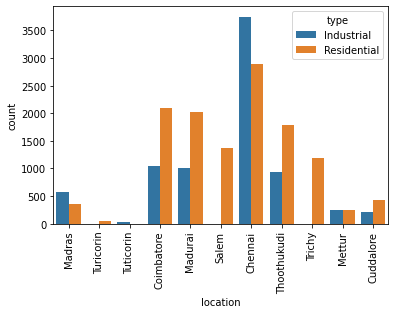

In [27]:
datacount_ty =sns.countplot(x ="location",hue = 'type',data = tn);
datacount_ty.set_xticklabels(datacount_ty.get_xticklabels(), rotation=90);

In [28]:
null_data = tn[tn.isnull().any(axis=1)]
null_data.head(20)

,state,location,type,so2,no2,spm,date
343962,Tamil Nadu,Tuticorin,NaN,10.2,16.7,194.0,1991-09-01
343984,Tamil Nadu,Tuticorin,NaN,7.2,16.4,82.0,1991-12-01
343985,Tamil Nadu,Tuticorin,NaN,8.2,5.4,47.0,1991-12-01
343986,Tamil Nadu,Tuticorin,NaN,8.0,12.4,44.0,1991-12-01
344142,Tamil Nadu,Tuticorin,NaN,3.7,17.8,80.0,1994-09-01
344143,Tamil Nadu,Tuticorin,NaN,6.4,20.9,68.0,1994-09-01
344147,Tamil Nadu,Tuticorin,NaN,3.7,17.8,80.0,1994-09-01
344148,Tamil Nadu,Tuticorin,NaN,6.4,20.9,68.0,1994-09-01
344155,Tamil Nadu,Coimbatore,NaN,6.0,16.0,55.0,1995-01-01
344156,Tamil Nadu,Coimbatore,NaN,0.9,9.2,44.0,1995-03-01


In [29]:
tn['type'] = tn['type'].replace(np.nan, "Residential")

<ipython-input-29-22532eb3e575>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['type'] = tn['type'].replace(np.nan, "Residential")


In [30]:
tn.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
spm         0
date        0
dtype: int64

In [31]:
tn['location'].replace("Turicorin","Tuticorin",inplace=True)
tn['location'].replace("Madras","Chennai",inplace=True)

<ipython-input-31-d0f4d0f77138>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['location'].replace("Turicorin","Tuticorin",inplace=True)
<ipython-input-31-d0f4d0f77138>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['location'].replace("Madras","Chennai",inplace=True)


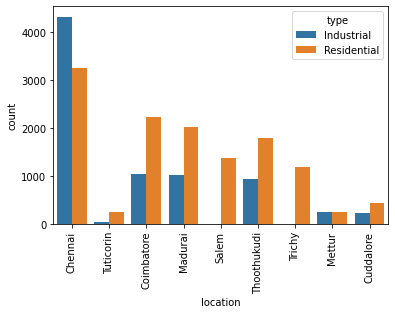

In [32]:
datacount_ty =sns.countplot(x ="location",hue = 'type',data = tn);
datacount_ty.set_xticklabels(datacount_ty.get_xticklabels(), rotation=90);

In [33]:
tn.head()


,state,location,type,so2,no2,spm,date
343639,Tamil Nadu,Chennai,Industrial,0.5,0.3,82.0,1987-01-27
343640,Tamil Nadu,Chennai,Industrial,12.9,1.3,290.0,1987-04-13
343641,Tamil Nadu,Chennai,Industrial,38.8,0.9,222.0,1987-01-05
343642,Tamil Nadu,Chennai,Industrial,29.7,1.1,213.0,1987-01-06
343643,Tamil Nadu,Chennai,Industrial,27.5,1.3,223.0,1987-01-07


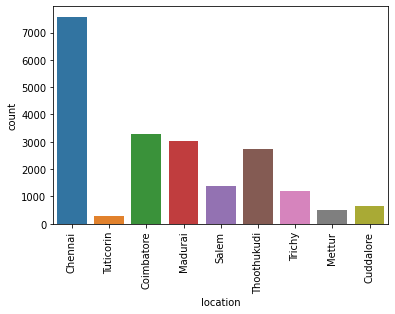

In [34]:
datacount =sns.countplot(x ="location",data = tn);
datacount.set_xticklabels(datacount.get_xticklabels(), rotation=90);

In [35]:
loc = pd.pivot_table(tn, values=['so2','no2','spm'],index='location') 
loc

,no2,so2,spm
location,,,
Chennai,18.551330,11.905157,199.767056
Coimbatore,29.374767,5.832845,188.888683
Cuddalore,19.772657,9.110599,267.000000
Madurai,24.420616,11.153280,179.156298
Mettur,24.039095,8.399177,267.000000
Salem,25.764407,8.190645,179.440385
Thoothukudi,16.948928,17.532772,210.858009
Trichy,18.211327,13.753170,267.000000
Tuticorin,14.505208,10.176389,51.322917


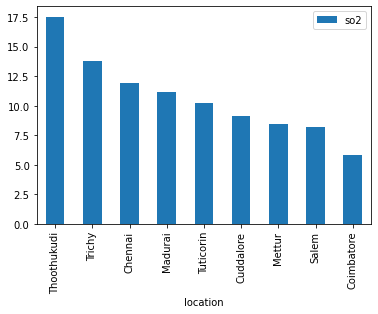

In [36]:
maxso2 = loc.sort_values(by='so2',ascending=False)
maxso2.loc[:,['so2']].head(10).plot(kind='bar');

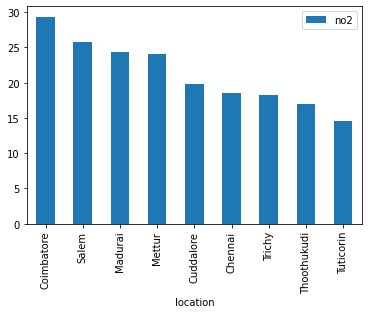

In [37]:
maxno2 = loc.sort_values(by='no2',ascending=False);
maxno2.loc[:,['no2']].head(10).plot(kind='bar');

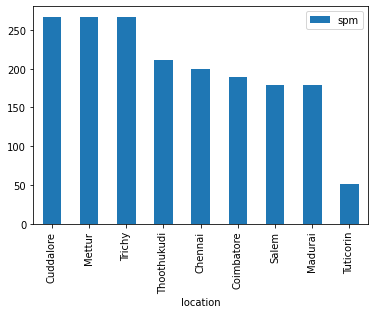

In [38]:
maxspm = loc.sort_values(by='spm',ascending=False);
maxspm.loc[:,['spm']].head(10).plot(kind='bar');

In [39]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= "s1"
    if (so2>40 and so2<=80):
     si= "s2"
    if (so2>80 and so2<=380):
     si= "s3"
    if (so2>380 and so2<=800):
     si= "s4"
    if (so2>800 and so2<=1600):
     si= "s5"
    if (so2>1600):
     si= "s6"
    return si
tn['si']=tn['so2'].apply(calculate_si)
ds= tn[['so2','si']]
ds.tail()

<ipython-input-39-496e32576f2f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['si']=tn['so2'].apply(calculate_si)


,so2,si
364231,13.0,s1
364232,13.0,s1
364233,14.0,s1
364234,15.0,s1
364235,15.0,s1


In [40]:
def calculate_ni(no2):
    ni=0
    if (no2<=40):
     ni= "n1"
    if (no2>40 and no2<=80):
     ni= "n2"
    if (no2>80 and no2<=180):
     ni= "n3"
    if (no2>180 and no2<=280):
     ni= "n4"
    if (no2>280 and no2<=400):
     ni= "n5"
    if (no2>400):
     ni= "n6"
    return ni
tn['ni']=tn['no2'].apply(calculate_ni)
dn= tn[['no2','ni']]
dn.tail()

<ipython-input-40-fbd51cf15376>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['ni']=tn['no2'].apply(calculate_ni)


,no2,ni
364231,22.0,n1
364232,22.0,n1
364233,24.0,n1
364234,25.0,n1
364235,24.0,n1


In [41]:
def calculate_spi(spm):
    spi=0
    if (spm<=40):
      spi= "sp1"
    if (spm>40 and spm<=80):
      spi= "sp2"
    if (spm>80 and spm<=180):
      spi= "sp3"
    if (spm>180 and spm<=280):
      spi= "sp4"
    if (spm>280 and spm<=400):
      spi= "sp5"
    if (spm>400):
      spi= "sp6"
    return  spi
tn['spi']=tn['spm'].apply(calculate_spi)
dsp= tn[['spm','spi']]
dsp.tail()

<ipython-input-41-eaf5e634dd69>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['spi']=tn['spm'].apply(calculate_spi)


,spm,spi
364231,267.0,sp4
364232,267.0,sp4
364233,267.0,sp4
364234,267.0,sp4
364235,267.0,sp4


In [42]:
tn.sample(5)

,state,location,type,so2,no2,spm,date,si,ni,spi
357639,Tamil Nadu,Coimbatore,Industrial,5.000000,27.000000,267.000000,2013-03-09,s1,n1,sp4
362410,Tamil Nadu,Chennai,Industrial,29.000000,15.000000,267.000000,2015-06-12,s1,n1,sp4
352546,Tamil Nadu,Coimbatore,Residential,5.160000,33.860000,151.666667,2010-04-01,s1,n1,sp3
354042,Tamil Nadu,Coimbatore,Residential,4.000000,18.000000,267.000000,2011-05-19,s1,n1,sp4
353183,Tamil Nadu,Thoothukudi,Residential,8.983333,26.666667,144.000000,2010-04-19,s1,n1,sp3


In [43]:
def calculate_aqi(si,ni,spi):
    aqi=0
    if(si>ni and si>spi):
     aqi=si
    if (spi>ni and spi>si):
     aqi=spi
    if(ni>si and ni>spi):
     aqi= ni
    return aqi
tn['AQI']=tn.apply(lambda x:calculate_aqi(x['so2'],x['no2'],x['spm']),axis=1)

<ipython-input-43-62d7abe58ca6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['AQI']=tn.apply(lambda x:calculate_aqi(x['so2'],x['no2'],x['spm']),axis=1)


In [44]:
tn.head()


,state,location,type,so2,no2,spm,date,si,ni,spi,AQI
343639,Tamil Nadu,Chennai,Industrial,0.5,0.3,82.0,1987-01-27,s1,n1,sp3,82.0
343640,Tamil Nadu,Chennai,Industrial,12.9,1.3,290.0,1987-04-13,s1,n1,sp5,290.0
343641,Tamil Nadu,Chennai,Industrial,38.8,0.9,222.0,1987-01-05,s1,n1,sp4,222.0
343642,Tamil Nadu,Chennai,Industrial,29.7,1.1,213.0,1987-01-06,s1,n1,sp4,213.0
343643,Tamil Nadu,Chennai,Industrial,27.5,1.3,223.0,1987-01-07,s1,n1,sp4,223.0


In [141]:
def pred(day):
  print("expected Air quality on ",day,"is : ",253)
  pvalue= 253

In [150]:
aq_wise = pd.pivot_table(tn, values=['AQI'],index='location')
pvalue = 253
aq_wise

,AQI
location,
Chennai,200.055794
Coimbatore,189.199613
Cuddalore,267.000000
Madurai,179.283224
Mettur,267.000000
Salem,179.550399
Thoothukudi,210.887068
Trichy,267.000000
Tuticorin,52.573958


<Axes: xlabel='location'>

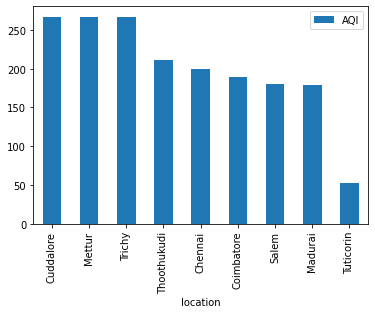

In [46]:
maxaqi = aq_wise.sort_values(by='AQI',ascending=False)
maxaqi.loc[:,['AQI']].head(37).plot(kind='bar')

In [47]:
date_wise = pd.pivot_table(tn, values=['AQI'],index='date')
date_wise

,AQI
date,
1987-01-05,222.0
1987-01-06,213.0
1987-01-07,223.0
1987-01-12,118.5
1987-01-27,82.0
...,...
2015-12-26,267.0
2015-12-28,267.0
2015-12-29,267.0


<Axes: xlabel='date'>

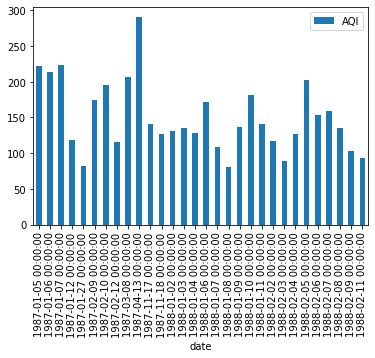

In [50]:
date_wise.loc[:,['AQI']].head(30).plot(kind='bar')

<Axes: xlabel='date'>

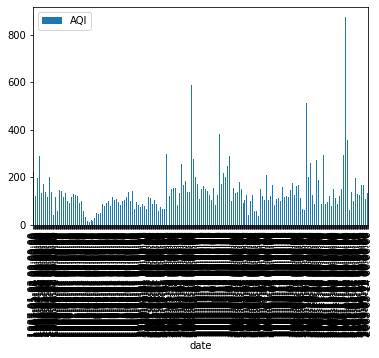

In [52]:
date_wise.loc[:,['AQI']].head(500).plot(kind='bar')

In [56]:
date_wise.shape

(3559, 1)

In [58]:
from sklearn.ensemble import RandomForestRegressor


In [64]:
from sklearn.model_selection import train_test_split


In [67]:
dum1 = pd.get_dummies(tn['type'])
dum2 = pd.get_dummies(tn['location'])
tn['year'] = tn['date'].dt.year

<ipython-input-67-5b28109ad005>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tn['year'] = tn['date'].dt.year


In [68]:
td = pd.concat([tn, dum1, dum2], axis = 1)
td.head()

,state,location,type,so2,no2,spm,date,si,ni,spi,...,Residential,Chennai,Coimbatore,Cuddalore,Madurai,Mettur,Salem,Thoothukudi,Trichy,Tuticorin
343639,Tamil Nadu,Chennai,Industrial,0.5,0.3,82.0,1987-01-27,s1,n1,sp3,...,0,1,0,0,0,0,0,0,0,0
343640,Tamil Nadu,Chennai,Industrial,12.9,1.3,290.0,1987-04-13,s1,n1,sp5,...,0,1,0,0,0,0,0,0,0,0
343641,Tamil Nadu,Chennai,Industrial,38.8,0.9,222.0,1987-01-05,s1,n1,sp4,...,0,1,0,0,0,0,0,0,0,0
343642,Tamil Nadu,Chennai,Industrial,29.7,1.1,213.0,1987-01-06,s1,n1,sp4,...,0,1,0,0,0,0,0,0,0,0
343643,Tamil Nadu,Chennai,Industrial,27.5,1.3,223.0,1987-01-07,s1,n1,sp4,...,0,1,0,0,0,0,0,0,0,0


In [69]:
td.drop(labels = ['state','location','type','so2','no2','spm','si','ni','spi','date'], axis = 1, inplace = True)
td.sample(2)

,AQI,year,Industrial,Residential,Chennai,Coimbatore,Cuddalore,Madurai,Mettur,Salem,Thoothukudi,Trichy,Tuticorin
357346,267.000000,2013,1,0,1,0,0,0,0,0,0,0,0
353271,285.666667,2010,1,0,0,0,0,0,0,0,1,0,0


In [70]:
td.corr()


,AQI,year,Industrial,Residential,Chennai,Coimbatore,Cuddalore,Madurai,Mettur,Salem,Thoothukudi,Trichy,Tuticorin
AQI,1.000000,0.646473,0.057981,-0.057981,-0.006406,-0.056296,0.133554,-0.099989,0.114920,-0.063568,0.043930,0.182486,-0.197143
year,0.646473,1.000000,-0.085917,0.085917,-0.123071,-0.056847,0.158258,0.011918,0.138348,0.015006,0.047736,0.186706,-0.307805
Industrial,0.057981,-0.085917,1.000000,-1.000000,0.300520,-0.054400,-0.017697,-0.038487,0.038661,-0.209332,-0.027929,-0.192979,-0.064122
Residential,-0.057981,0.085917,-1.000000,1.000000,-0.300520,0.054400,0.017697,0.038487,-0.038661,0.209332,0.027929,0.192979,0.064122
Chennai,-0.006406,-0.123071,0.300520,-0.300520,1.000000,-0.331489,-0.137904,-0.317511,-0.118663,-0.204397,-0.297876,-0.188430,-0.090901
Coimbatore,-0.056296,-0.056847,-0.054400,0.054400,-0.331489,1.000000,-0.078454,-0.180633,-0.067508,-0.116282,-0.169463,-0.107199,-0.051714
Cuddalore,0.133554,0.158258,-0.017697,0.017697,-0.137904,-0.078454,1.000000,-0.075146,-0.028084,-0.048375,-0.070499,-0.044596,-0.021514
Madurai,-0.099989,0.011918,-0.038487,0.038487,-0.317511,-0.180633,-0.075146,1.000000,-0.064661,-0.111379,-0.162317,-0.102678,-0.049533
Mettur,0.114920,0.138348,0.038661,-0.038661,-0.118663,-0.067508,-0.028084,-0.064661,1.000000,-0.041626,-0.060663,-0.038374,-0.018512
Salem,-0.063568,0.015006,-0.209332,0.209332,-0.204397,-0.116282,-0.048375,-0.111379,-0.041626,1.000000,-0.104491,-0.066099,-0.031887


<Axes: xlabel='year'>

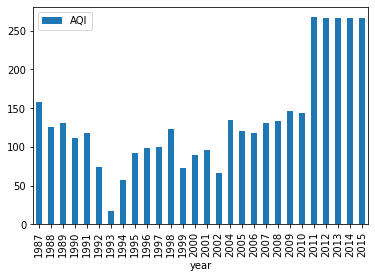

In [71]:
yr_wise = pd.pivot_table(td, values=['AQI'],index='year')
yr_wise.loc[:,['AQI']].head(30).plot(kind='bar')

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X=td.drop("AQI",axis=1)
y=td["AQI"]

In [74]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=25)

In [75]:
rfr= RandomForestRegressor (n_estimators=10,random_state=25,max_features=5)
rfr=rfr.fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.7316928947040389
0.7761367960037955


In [76]:
rfr= RandomForestRegressor (n_estimators=11,random_state=25,max_features=5)
rfr=rfr.fit(X_train,y_train)
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))

0.7317456980511001
0.776008309930724


In [80]:
rfr= RandomForestRegressor (n_estimators=10,random_state=25,max_features=10)
rfr=rfr.fit(X_train,y_train)
rfr_tr = rfr.score(X_train,y_train)
rfr_ts = rfr.score(X_test,y_test)
print(rfr_tr)
print(rfr_ts)

0.7317018765899191
0.7761620422920031


In [91]:
from sklearn.ensemble import GradientBoostingRegressor

In [92]:
gbr= GradientBoostingRegressor (n_estimators=10,random_state=25)
gbr=gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.5842205537720442
0.6290894003600735


In [93]:
gbr= GradientBoostingRegressor (n_estimators=400,random_state=25)
gbr=gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7247539388723996
0.7751318074743498


In [94]:
gbr= GradientBoostingRegressor (n_estimators=410,random_state=25)
gbr=gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7248060365277629
0.775075734837311


In [95]:
gbr= GradientBoostingRegressor (n_estimators=400,random_state=25)
gbr=gbr.fit(X_train,y_train)
gbr_tr= gbr.score(X_train,y_train)
gbr_ts= gbr.score(X_test,y_test)

In [96]:
print(gbr_ts)
print(gbr_tr)

0.7751318074743498
0.7247539388723996


In [98]:
score_res = pd.DataFrame({'Model':['GradientBoosting','RandomForest'],
                          'Train Score':[gbr_tr, rfr_tr],
                         'Test Score':[gbr_ts, rfr_ts]
                         })
score_res

,Model,Train Score,Test Score
0,GradientBoosting,0.724754,0.775132
1,RandomForest,0.731702,0.776162


In [100]:
import joblib 
joblib.dump(gbr_tr,'Pollution_model')

['Pollution_model']

In [101]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [108]:
X_test

,year,Industrial,Residential,Chennai,Coimbatore,Cuddalore,Madurai,Mettur,Salem,Thoothukudi,Trichy,Tuticorin
354809,2011,0,1,0,0,0,0,0,0,1,0,0
363279,2015,0,1,0,0,1,0,0,0,0,0,0
362677,2015,0,1,0,0,0,0,0,0,1,0,0
344717,1999,1,0,1,0,0,0,0,0,0,0,0
351264,2009,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
358943,2013,1,0,0,0,0,0,0,0,1,0,0
350212,2008,0,1,0,0,0,1,0,0,0,0,0
356739,2013,0,1,1,0,0,0,0,0,0,0,0
348012,2007,1,0,1,0,0,0,0,0,0,0,0


In [115]:
PM = joblib.load('Pollution_model')

In [122]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url= "https://www.ideasforindia.in/images/prachi%20(1).png", width=700,height=700)
image.plot(tn[PM2.5])
date= ['2010':2016]
pollution_map, df1 = plot_model
pollution_map.save('pollution_so2.html')
pollution_map


In [163]:
pred("Chennai : monday ")

expected Air quality on  Chennai : monday  is :  253


In [164]:
if pvalue > 250:
  print("Make sure to Wear Masks")
  print("Try not to travel")
elif pvalue < 80:
  print("everything is cool")

Make sure to Wear Masks
Try not to travel
